In [39]:
import csv
import numpy as np
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
from tabulate import tabulate


In [40]:
results_summary = pd.read_csv('ShinyApp/ShinyData_cancer_diagnosis.csv', index_col = 0)

In [42]:
results_summary_N15 = results_summary[np.logical_and(np.logical_and(results_summary['N'] == 15,
                                                                    results_summary['Data'] == 'prot'),
                                                     np.logical_and(results_summary['Model'] == 'prevalent',
                                                                   results_summary['control_data'] == 'NonCancer'))]
results_summary_N15.index = range(len(results_summary_N15.index))

In [4]:
from IPython.display import display

GO_enrichemnt = list()
GO_enrichemnt_top5 = list()
for i in range(len(results_summary_N15)):
    print(results_summary_N15.loc[i]['Disease'])

    original_string = results_summary_N15['Features'][i]
    string_list = original_string[2:-2].split("', '")
    enr_KEEG = gp.enrichr(gene_list=string_list,
    gene_sets=['GO_Biological_Process_2023'],
    organism='Human').results
    
    summary = enr_KEEG[enr_KEEG['Adjusted P-value'] < 0.05][['Term', 'Adjusted P-value']]
    summary['disease'] = results_summary_N15.loc[i]['Disease']

    summary_top5 = enr_KEEG[enr_KEEG['Adjusted P-value'] < 0.05][:5][['Term', 'Adjusted P-value']]
    summary_top5['disease'] = results_summary_N15.loc[i]['Disease']
    
    GO_enrichemnt.append(summary)
    GO_enrichemnt_top5.append(summary_top5)


AllCancers
Bladder
Breast
Colorectal
Kidney
Leukaemia
Lung
Lymphoma
Malignant_melanoma
Ovarian
Prostate
Thyroid
Uterine


In [5]:
GO_enrichemnt_top5 = pd.concat(GO_enrichemnt_top5)
GO_enrichemnt = pd.concat(GO_enrichemnt)

In [6]:
GO_enrichemnt_top5_wide = GO_enrichemnt_top5.pivot(index='Term', columns='disease', values='Adjusted P-value')

In [7]:
GO_enrichemnt_top5_wide = GO_enrichemnt_top5_wide.replace(np.nan, 1)

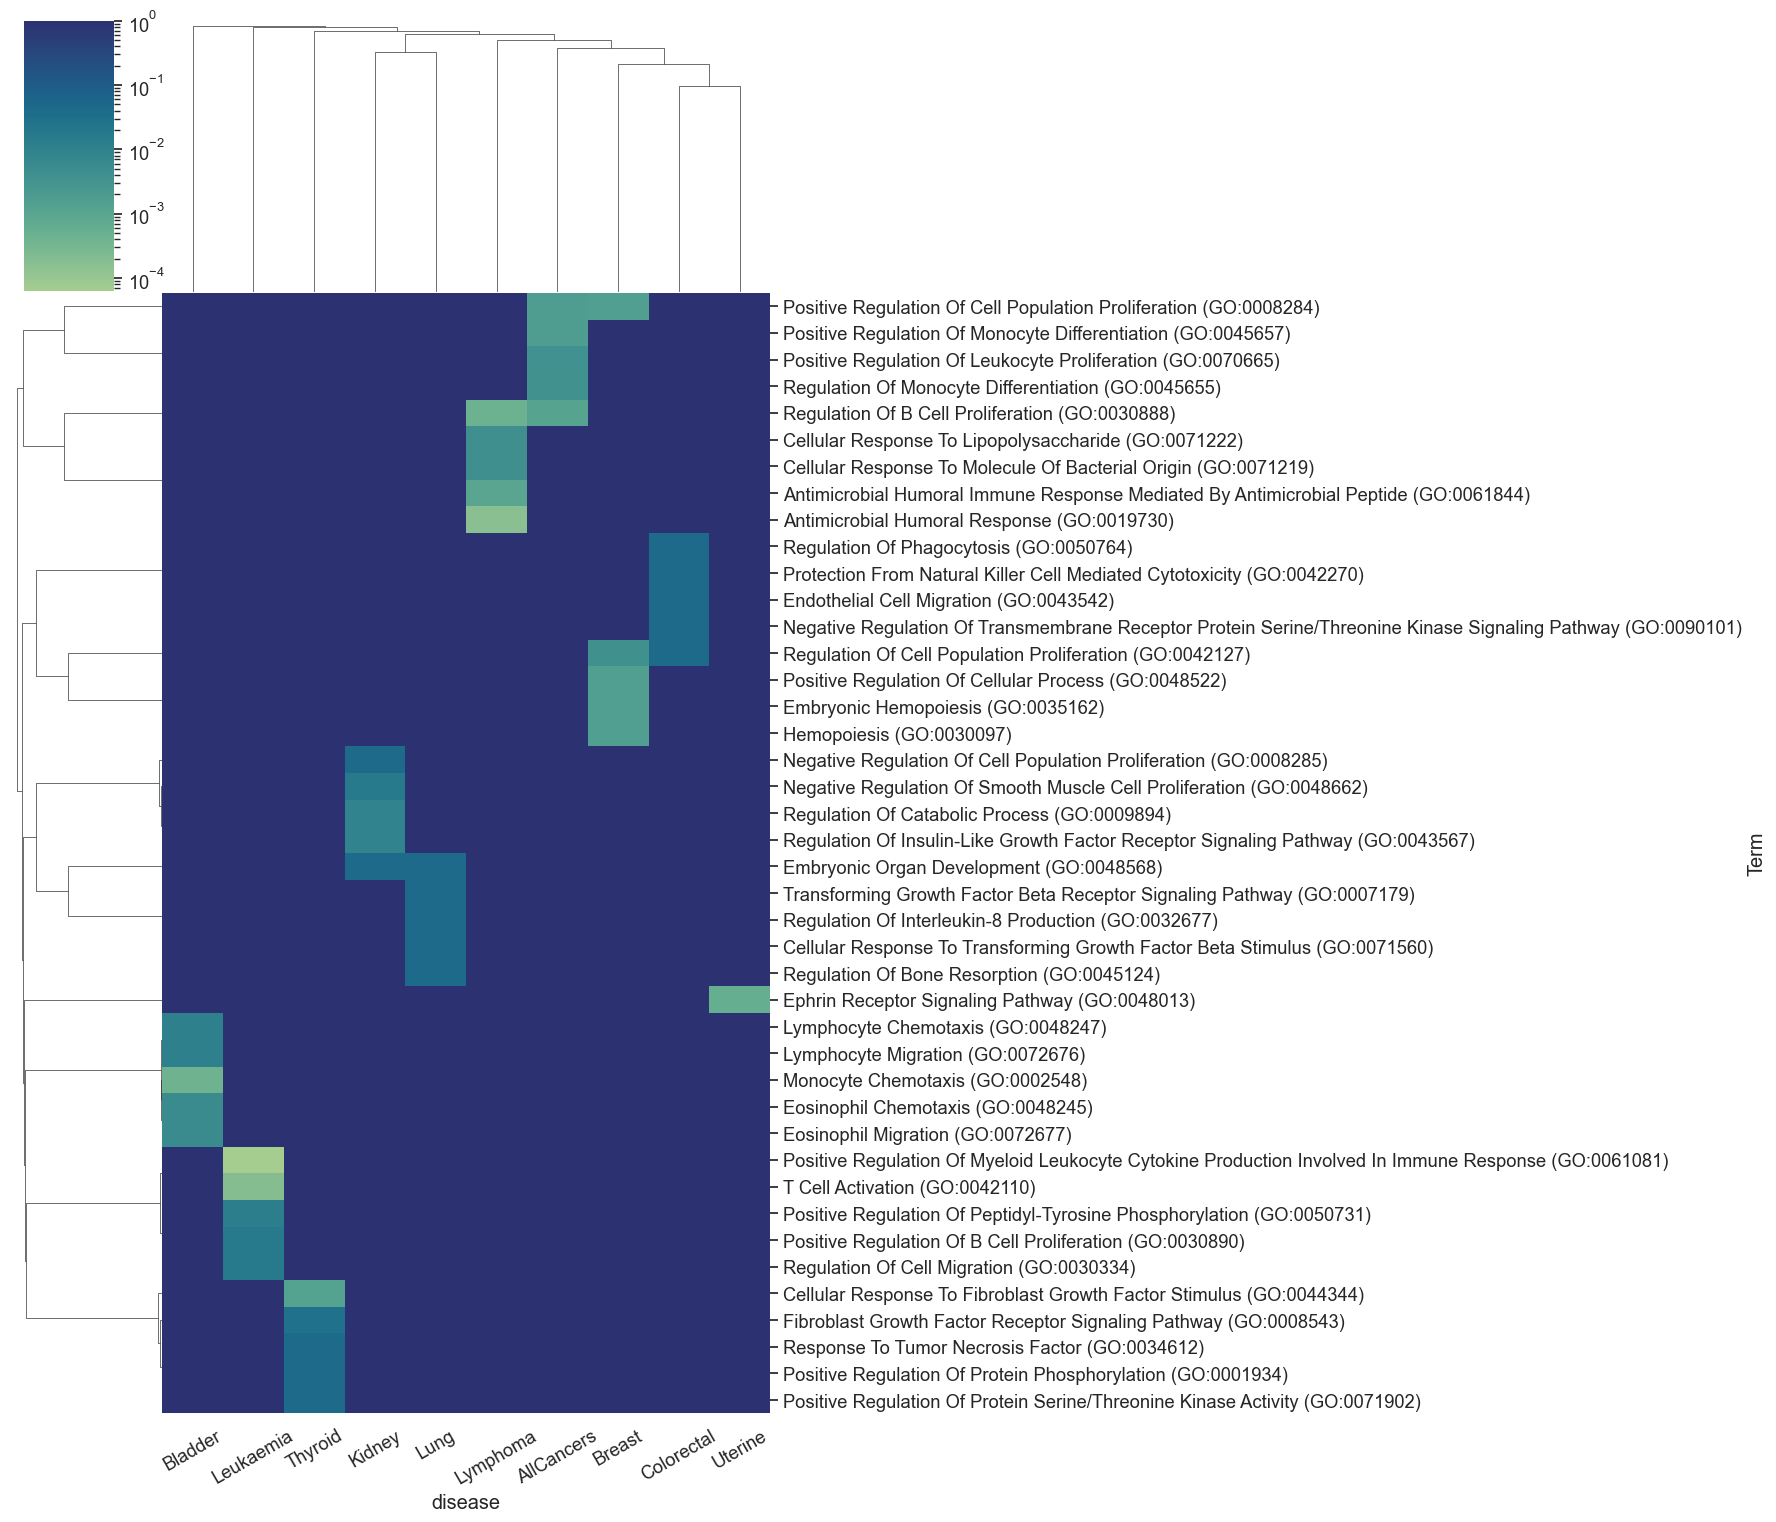

In [28]:
import seaborn as sns
from matplotlib.colors import LogNorm
sns.set(font_scale=1.2)
g = sns.clustermap(GO_enrichemnt_top5_wide, norm=LogNorm(), figsize = (18,15), cmap="crest")
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=30)
plt.savefig("Enrichemnt analysis.png")

In [31]:
GO_enrichemnt_wide = GO_enrichemnt.pivot(index='Term', columns='disease', values='Adjusted P-value')

In [38]:
GO_enrichemnt[['disease', 'Adjusted P-value', 'Term']].to_csv('GO_enrichment2.csv', index = False)

In [45]:
human = gp.get_library_name(organism='human')
human

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'Diabetes_Perturbations_GEO_2022',
 'DisG